# **[AIB] Section 1 : Introduction to Data Science - Project**


0.   데이터 전처리
1.   지역별 게임 트렌드
2.   시대별 게임 트렌드
3.   출고량이 높은 게임은?





# **0. 데이터 전처리**
---

In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기
data_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2.csv')
data_original

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
# 결측치 제거 및 인덱스 초기화
data = data_original.iloc[:,1:]
data = data.dropna().reset_index(drop=1)
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
# 판매량 단위 통일 및 실수형으로 변환

def modify_sales(x):
  try:
    if 'K' in x:
      return float(x.replace('K',''))/1000
    elif 'M' in x:
      return float(x.replace('M',''))
    else :
      return float(x)
  except:
    return x

df_modify1 = data[:]

col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for m in col:
  df_modify1[m]=data[m].apply(modify_sales)

df_modify1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
# 년도 표기법 통일 및 정수형으로 변환

def modify_year(x):
  if x <= 22:
    return int(x + 2000)
  elif x < 100:
    return int(x + 1900)
  else:
    return int(x)

df_modify2 = df_modify1[:]
df_modify2['Year'] = df_modify1['Year'].apply(modify_year)
df_modify2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# **1. 지역별 게임 트렌드**

---

In [33]:
df = df_modify2[:]

df.loc[df['Genre']=='Racing'].describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
mean,2004.841674,0.290976,0.192797,0.046202,0.062765
std,5.282530,0.750121,0.587499,0.269769,0.274321
min,1981.000000,0.000000,0.000000,0.000000,0.000000
25%,2002.000000,0.030000,0.010000,0.000000,0.000000
50%,2005.000000,0.100000,0.040000,0.000000,0.010000
75%,2009.000000,0.270000,0.160000,0.000000,0.050000
max,2016.000000,15.850000,12.880000,4.130000,7.530000


In [34]:
df.loc[df['Genre']=='Racing','JP_Sales'].quantile(0.9)

0.04

In [8]:
# 각 나라별로 아웃라이어를 제거할 경우

#index = []
#Genre_list = list(set(df['Genre']))

#for x in Genre_list:
#  for y in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
#    Genre_data = df.loc[df['Genre'] == x]
#    Q1 = Genre_data[y].quantile(0.25)
#    Q3 = Genre_data[y].quantile(0.75)
#    IQR = Q3 - Q1
#    condition=(Genre_data[y]>Q3+1.5*IQR)|(Genre_data[y]<Q1-1.5*IQR)
#    index.extend(Genre_data[condition].index)

#len(set(index))

In [35]:
Genre_list = list(set(df['Genre']))

# 국가별 장르-매출 데이터 프레임 작성 및 아웃라이어 제거
for y in ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']:
  locals()[f'df_{y}']= df[['Genre',f'{y}']]
  locals()[f'outlier_{y}'] = []
  for x in Genre_list:
    Genre_data = df.loc[df['Genre'] == x]
    Q1 = Genre_data[y].quantile(0.25)
    Q3 = Genre_data[y].quantile(0.75)
    IQR = Q3 - Q1
    condition=(Genre_data[y]>Q3+1.5*IQR)|(Genre_data[y]<Q1-1.5*IQR) # 이상치에 해당하는 조건
    locals()[f'outlier_{y}'].extend(Genre_data[condition].index) # 조건을 만족하는 데이터의 인덱스를 저장
  locals()[f'df_{y}'] = locals()[f'df_{y}'].drop(locals()[f'outlier_{y}']) # 데이터에서 해당 인덱스 제거
  print(f'{y}에서 제거된 Outlier',len(locals()[f'outlier_{y}']),'개')

# 판매량이 0 인 수 많은 데이터 때문에 이상치가 지나치게 많이 나온 감이 있다.
# 고려 해볼만한 방법 : 전세계 누적 판매량을 기준으로 하위 n% 를 잘라버린다. 그래도 될까?

NA_Sales에서 제거된 Outlier 1706 개
EU_Sales에서 제거된 Outlier 2004 개
JP_Sales에서 제거된 Outlier 2621 개
Other_Sales에서 제거된 Outlier 1837 개


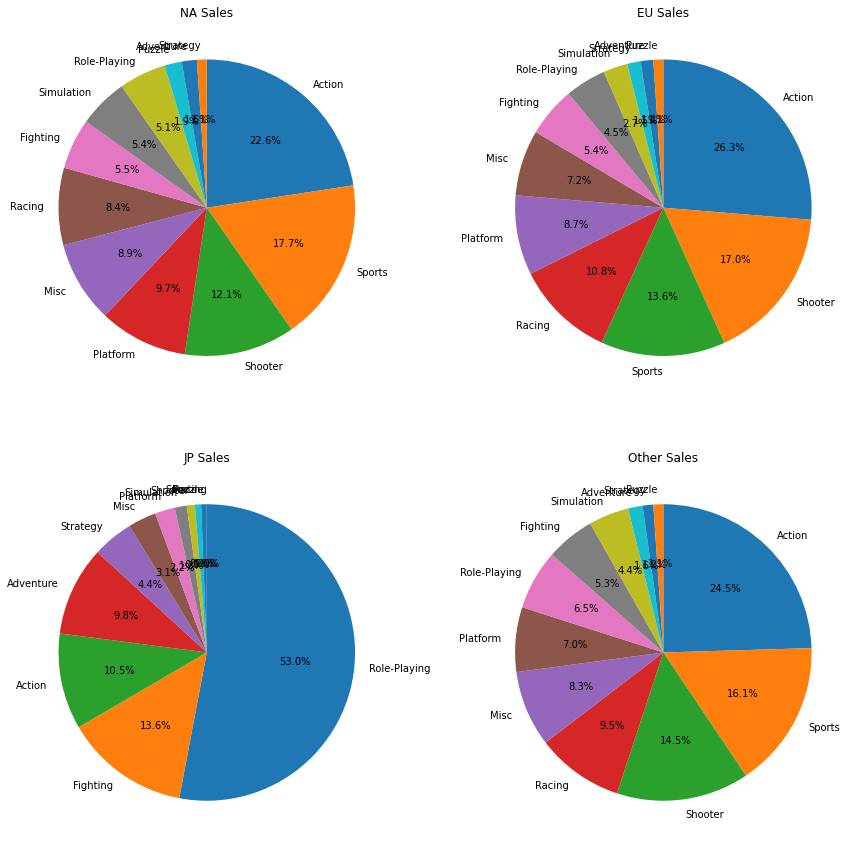

In [36]:
NP = df_NA_Sales.groupby('Genre').sum().sort_values('NA_Sales',ascending = False) #장르를 기준으로 그룹화하여 판매량의 합을 구한 후 내림차순 정렬
EU = df_EU_Sales.groupby('Genre').sum().sort_values('EU_Sales',ascending = False)
JP = df_JP_Sales.groupby('Genre').sum().sort_values('JP_Sales',ascending = False)
Other = df_Other_Sales.groupby('Genre').sum().sort_values('Other_Sales',ascending = False)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.title('NA Sales')
plt.pie(NP['NA_Sales'], labels=NP.index, counterclock= False , startangle=90, autopct = '%.1f%%')

plt.subplot(2, 2, 2)
plt.title('EU Sales')
plt.pie(EU['EU_Sales'], labels=EU.index, counterclock= False , startangle=90, autopct = '%.1f%%')

plt.subplot(2, 2, 3)
plt.title('JP Sales')
plt.pie(JP['JP_Sales'], labels=JP.index, counterclock= False , startangle=90, autopct = '%.1f%%')

plt.subplot(2, 2, 4)
plt.title('Other Sales')
plt.pie(Other['Other_Sales'], labels=Other.index, counterclock= False , startangle=90, autopct = '%.1f%%')
plt.show()

# **2. 시대별 게임 트렌드**

---



In [ ]:
df_total = df[:]
df_total['Total_Sales'] = df_total['NA_Sales']+df_total['EU_Sales']+df_total['JP_Sales']+df_total['Other_Sales']  #판매량을 합쳐 새로운 칼럼으로
df_total

In [37]:
# 5년 단위로 시간을 나누기
df_total['Year_s'] = pd.cut(df_total['Year'], 8, labels=['80~85', '86~90', '91~95','96~00','01~05','06~10','11~15','16~20'])
df_total_simple = df_total[['Genre','Total_Sales','Year_s']]
df_total_simple

,Genre,Total_Sales,Year_s
0,Action,0.04,06~10
1,Action,0.18,06~10
2,Adventure,0.02,06~10
3,Misc,0.04,06~10
4,Platform,0.25,06~10
...,...,...,...
16236,Platform,0.20,06~10
16237,Action,0.01,01~05
16238,Sports,0.79,11~15
16239,Action,0.38,11~15


In [38]:
# 시대별 매출 총합에 대한 장르별 매출의 비를 백분율로 표현
All_Genre = df_total_simple.groupby(['Year_s']).sum()
Each_Genre = df_total_simple.groupby(['Year_s','Genre']).sum()
genre_ratio = Each_Genre/All_Genre*100
genre_ratio = genre_ratio.reset_index()
genre_ratio

,Year_s,Genre,Total_Sales
0,80~85,Action,15.192836
1,80~85,Adventure,0.203521
2,80~85,Fighting,0.926020
3,80~85,Misc,3.643024
4,80~85,Platform,31.922255
...,...,...,...
91,16~20,Role-Playing,9.539196
92,16~20,Shooter,25.526833
93,16~20,Simulation,0.955325
94,16~20,Sports,20.553526


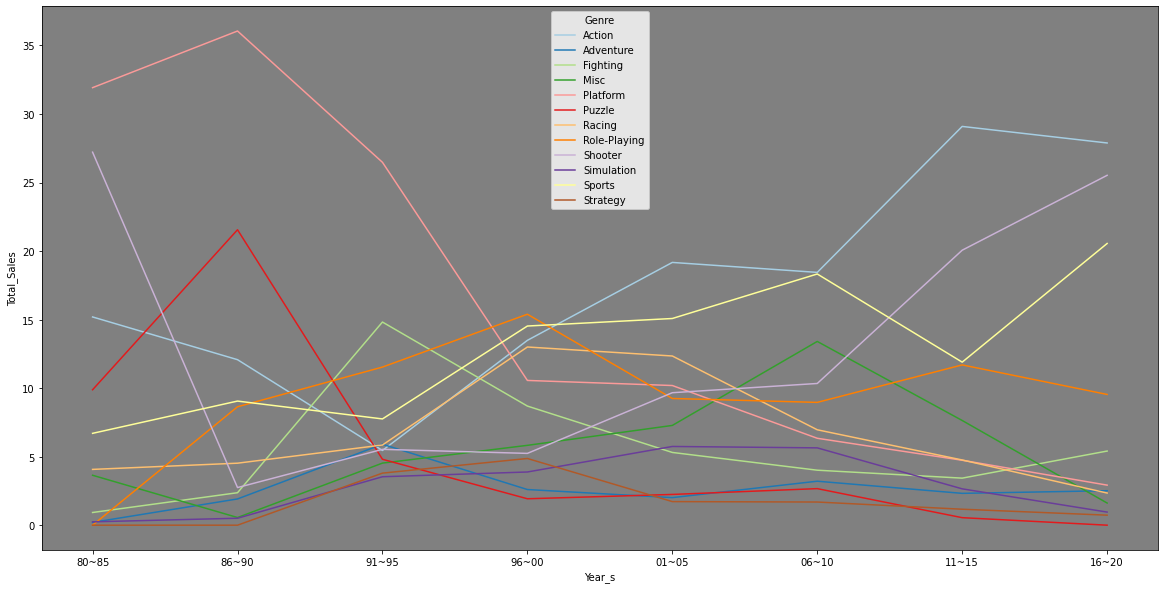

In [39]:
# 그래프
import seaborn as sns
plt.figure(figsize=(20,10),facecolor='white')
ax = plt.gca()
ax.set_facecolor('gray')
sns.lineplot(x='Year_s', y='Total_Sales', hue='Genre', data=genre_ratio, palette='Paired')
plt.show()

# **3. 출고량이 높은 게임은?**

---

In [40]:
for y in ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']:
  locals()[f'df_{y}']= df[['Genre',f'{y}']]
  locals()[f'outlier_{y}'] = []
  for x in Genre_list:
    Genre_data = df.loc[df['Genre'] == x]
    Q1 = Genre_data[y].quantile(0.25)
    Q3 = Genre_data[y].quantile(0.75)
    IQR = Q3 - Q1
    condition=(Genre_data[y]>Q3+1.5*IQR) # 이상치에 해당하는 조건
    locals()[f'outlier_{y}'].extend(Genre_data[condition].index) # 조건을 만족하는 데이터의 인덱스를 저장
  locals()[f'df_{y}'] = locals()[f'df_{y}'].loc[locals()[f'outlier_{y}']] # 데이터에서 해당 인덱스의 데이터만 추출

df_pop_NA = df.loc[sorted(df_NA_Sales.index)]
df_pop_EU = df.loc[sorted(df_EU_Sales.index)]
df_pop_JP = df.loc[sorted(df_JP_Sales.index)]
df_pop_Other = df.loc[sorted(df_Other_Sales.index)]

# 북미 지역 데이터를 활용함
df_pop_NA

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
35,Advance Wars: Dual Strike,DS,2005,Strategy,Nintendo,0.30,0.03,0.04,0.03
41,Phoenix Wright: Ace Attorney - Trials and Trib...,DS,2007,Adventure,Capcom,0.33,0.05,0.25,0.04
68,Command & Conquer,N64,1999,Strategy,Nintendo,0.22,0.05,0.00,0.00
90,Disney Universe,Wii,2011,Action,Disney Interactive Studios,0.67,0.30,0.00,0.10
99,Where's Waldo? The Fantastic Journey,Wii,2009,Adventure,Ubisoft,0.18,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...
16197,Left 4 Dead,X360,2008,Shooter,Electronic Arts,2.66,0.50,0.05,0.30
16217,Finding Nemo,PS2,2003,Action,THQ,1.26,0.60,0.05,0.18
16227,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,0.91,0.39,0.00,0.13
16229,Pokemon Channel,GC,2003,Adventure,Nintendo,0.24,0.06,0.07,0.01


In [41]:
list(set(df_pop_NA['Platform']))
#df_pop_NA['Platform'].value_counts()

['3DS',
 'NES',
 'Wii',
 'X360',
 'PS3',
 'N64',
 'PSV',
 'PS',
 'DC',
 'WiiU',
 'GBA',
 'PS2',
 'XB',
 'GB',
 'PC',
 'PS4',
 'PSP',
 'GC',
 'XOne',
 'DS',
 'SNES',
 '2600',
 'GEN']

In [42]:
# 플랫폼을 통합한 새로운 칼럼 생성
NA_list = []
for M in df_pop_NA['Platform']:
  if M in ['PS','PS2','PS3','PS4','PSP','PSV']:
    NA_list.append('Sony')
  elif M in ['DS','Wii','GBA','GC','N64','GB','NES','3DS','SENS','WiiU']:
    NA_list.append('Nintendo')
  elif M in ['X360','XB','XOne']:
    NA_list.append('Microsoft')
  else:
    NA_list.append('Misc')

df_pop_NA['Platform2'] = NA_list
df_pop_NA

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform2
35,Advance Wars: Dual Strike,DS,2005,Strategy,Nintendo,0.30,0.03,0.04,0.03,Nintendo
41,Phoenix Wright: Ace Attorney - Trials and Trib...,DS,2007,Adventure,Capcom,0.33,0.05,0.25,0.04,Nintendo
68,Command & Conquer,N64,1999,Strategy,Nintendo,0.22,0.05,0.00,0.00,Nintendo
90,Disney Universe,Wii,2011,Action,Disney Interactive Studios,0.67,0.30,0.00,0.10,Nintendo
99,Where's Waldo? The Fantastic Journey,Wii,2009,Adventure,Ubisoft,0.18,0.00,0.00,0.01,Nintendo
...,...,...,...,...,...,...,...,...,...,...
16197,Left 4 Dead,X360,2008,Shooter,Electronic Arts,2.66,0.50,0.05,0.30,Microsoft
16217,Finding Nemo,PS2,2003,Action,THQ,1.26,0.60,0.05,0.18,Sony
16227,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,0.91,0.39,0.00,0.13,Nintendo
16229,Pokemon Channel,GC,2003,Adventure,Nintendo,0.24,0.06,0.07,0.01,Nintendo


In [43]:
# 장르별 매출 총합에 대한 플랫폼별 매출의 비
df_Platform_NA = pd.DataFrame(index = list(set(df_pop_NA['Genre'])), columns = ['Nintendo','Sony','Microsoft','Misc']) #빈 데이터프레임

for x in list(set(df_pop_NA['Genre'])):
  for y in list(set(df_pop_NA['Platform2'])):
    Each = df_pop_NA.loc[(df_pop_NA['Genre'] == x) & (df_pop_NA['Platform2'] == y),'NA_Sales'].sum()
    All = df_pop_NA.loc[df_pop_NA['Genre'] == x,'NA_Sales'].sum()
    df_Platform_NA.loc[x,y] = Each / All

df_Platform_NA

,Nintendo,Sony,Microsoft,Misc
Action,0.260278,0.461239,0.243453,0.03503
Strategy,0.390048,0.137039,0.114567,0.358347
Platform,0.644611,0.183391,0.0,0.171998
Role-Playing,0.463812,0.259952,0.210451,0.065785
Shooter,0.131505,0.298894,0.495114,0.074488
Misc,0.563202,0.191421,0.207012,0.038366
Fighting,0.245739,0.514568,0.139166,0.100526
Sports,0.370616,0.412655,0.198015,0.018714
Simulation,0.57094,0.179088,0.051231,0.198741
Puzzle,0.797447,0.06293,0.0,0.139623


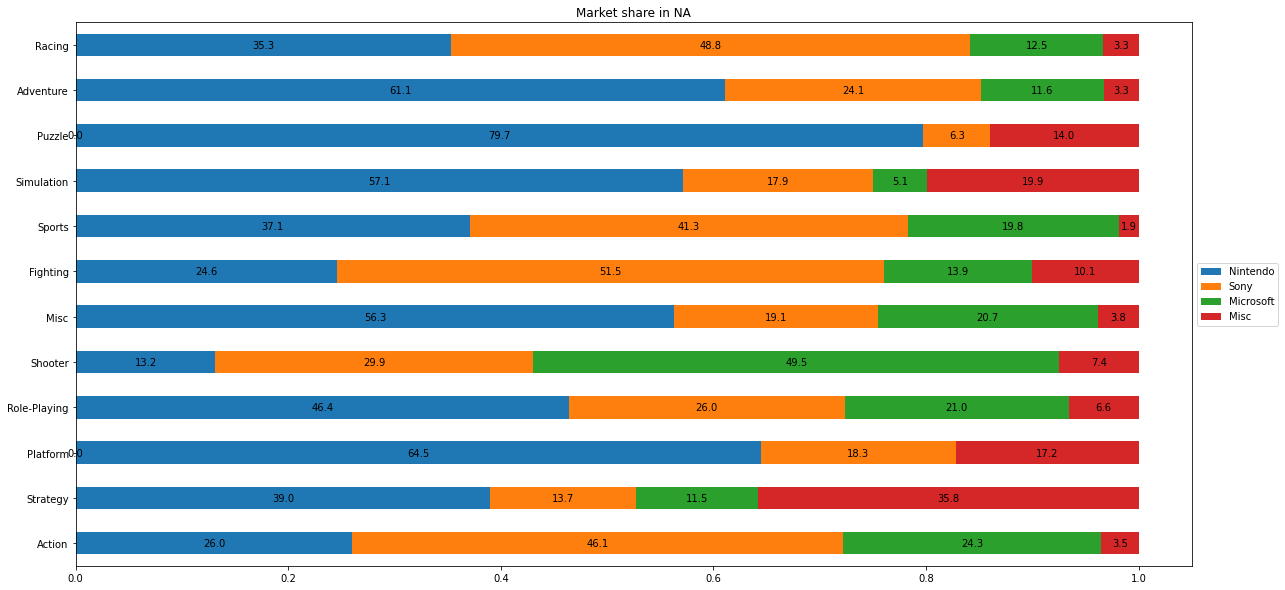

In [44]:
# 그래프
ax = df_Platform_NA.plot(kind='barh',figsize=(20,10), stacked=1, rot=0, title='Market share in NA')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

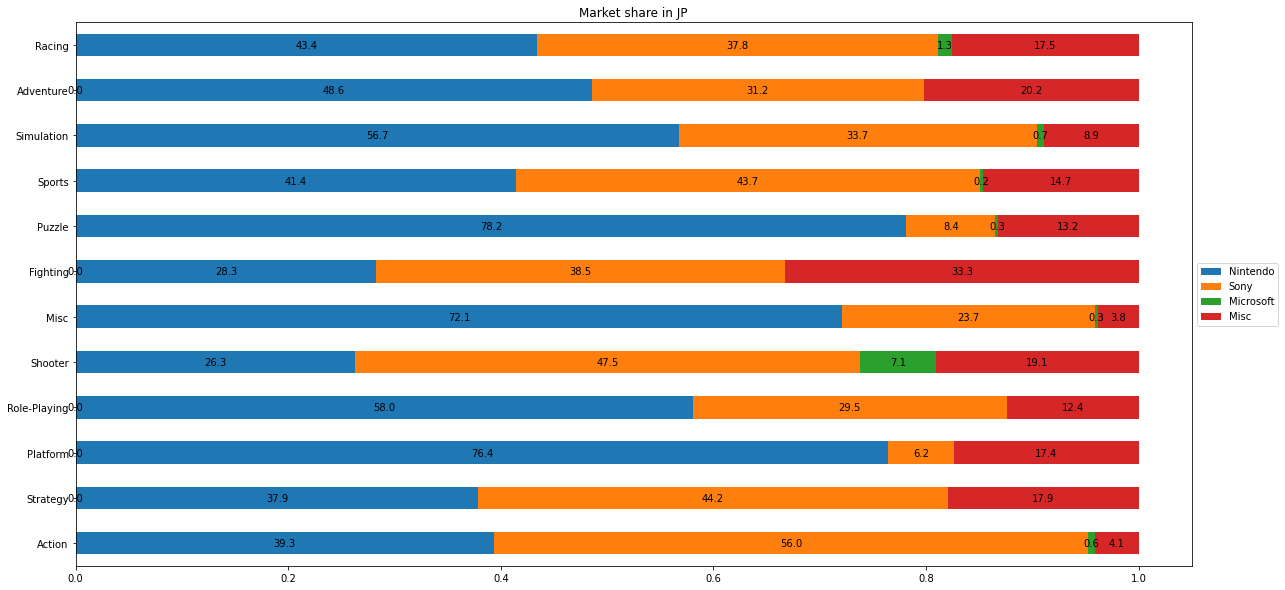

In [45]:
JP_list = []
for M in df_pop_JP['Platform']:
  if M in ['PS','PS2','PS3','PS4','PSP','PSV']:
    JP_list.append('Sony')
  elif M in ['DS','Wii','GBA','GC','N64','GB','NES','3DS','SENS','WiiU']:
    JP_list.append('Nintendo')
  elif M in ['X360','XB','XOne']:
    JP_list.append('Microsoft')
  else:
    JP_list.append('Misc')

df_pop_JP['Platform2'] = JP_list

df_Platform_JP = pd.DataFrame(index = list(set(df_pop_JP['Genre'])), columns = ['Nintendo','Sony','Microsoft','Misc'])

for x in list(set(df_pop_JP['Genre'])):
  for y in list(set(df_pop_JP['Platform2'])):
    Each = df_pop_JP.loc[(df_pop_JP['Genre'] == x) & (df_pop_JP['Platform2'] == y),'JP_Sales'].sum()
    All = df_pop_JP.loc[df_pop_JP['Genre'] == x,'JP_Sales'].sum()
    df_Platform_JP.loc[x,y] = Each / All

ax = df_Platform_JP.plot(kind='barh',figsize=(20,10), stacked=1, rot=0, title='Market share in JP')
for q in ax.patches:
    left, bottom, width, height = q.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()